In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
sns.set_theme()

import numpy as np
import pandas as pd

min_val, max_val = 0.5,1.0
n = 10
orig_cmap = sns.palettes.color_palette("Blues", as_cmap=True)
colors = orig_cmap(np.linspace(min_val, max_val, n))
blue_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("mycmap", colors)

min_val, max_val = 0.5,1.0
n = 10
orig_cmap = sns.palettes.color_palette("Reds", as_cmap=True)
colors = orig_cmap(np.linspace(min_val, max_val, n))
red_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("mycmap", colors)

In [9]:
bilstm_100 = 0.9032
bilstm_50 = 0.8801
bilstm_20 = 0.8467

cnnlstm_100 = 0.8829
cnnlstm_50 = 0.8757
cnnlstm_20 = 0.849

## Naive Training Comparison

In [88]:
DIR = "./wandb_csv_results/"
df = pd.read_csv(f"{DIR}/naive_bilstmm.csv", index_col=0)

In [89]:
column_name = list(filter(lambda x: "valid" in x and x.endswith(")"), df.columns))

In [90]:
df_rename = df[:100][column_name].rename(columns={
    c: ("Large" if c.startswith("L") else "Base") + " " + c.split("INIT")[1].split(" ")[0] for c in column_name
})

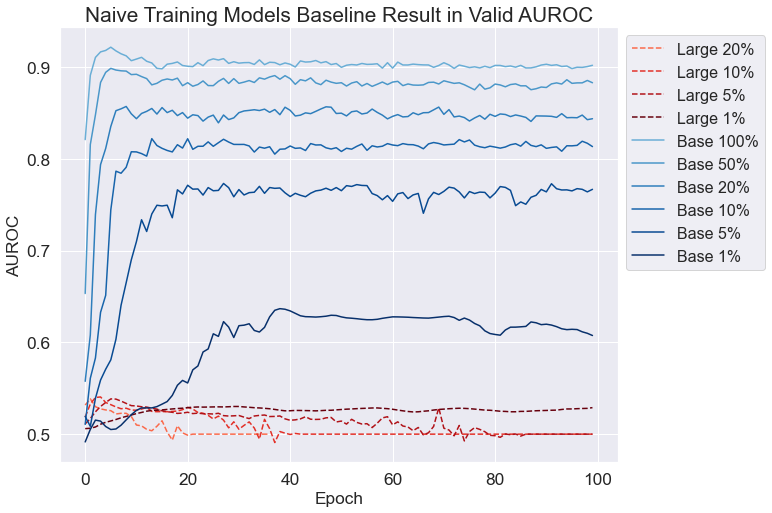

In [91]:
fig, ax = plt.subplots(figsize=(10, 8))

df_rename.loc[:, list(filter(lambda x: x.startswith("Large"), df_rename.columns))].plot(ax=ax, linestyle="--", colormap=red_cmap)
df_rename.loc[:, list(filter(lambda x: x.startswith("Base"), df_rename.columns))].plot(ax=ax, linestyle="-", colormap=blue_cmap)
ax.set_title("Naive Training Models Baseline Result in Valid AUROC", size="xx-large")
ax.set_xlabel("Epoch", size="x-large")
ax.set_ylabel("AUROC", size="x-large")
ax.tick_params(axis="both", labelsize="x-large")
# df_rename.plot.line(ax=ax, linestyle="--");
ax.legend(loc='best', bbox_to_anchor=(1., 1.), prop={"size": 16})

## BiLSTM/1dCNN Acq Method Comparison

In [93]:
fname = "bilstm_acqmethod"
DIR = "./wandb_csv_results/"
df = pd.read_csv(f"{DIR}/{fname}.csv", index_col=0)

column_name = list(filter(lambda x: "valid" in x and x.endswith(")"), df.columns))
df_rename = df[:100][column_name].rename(columns={
    c: c.split("Bilstm")[1].split(" ")[1].lower().capitalize() for c in column_name
})

In [94]:
fname = "1dcnn_acqmethod"
DIR = "./wandb_csv_results/"
df_1d = pd.read_csv(f"{DIR}/{fname}.csv", index_col=0)

column_name = list(filter(lambda x: "valid" in x and x.endswith(")"), df_1d.columns))

df_1d_rename = df_1d[:100][column_name].rename(columns={
    c: c.split("Cnnlstm")[1].split(" ")[1].lower().capitalize() for c in column_name
})

In [96]:
# fig, ax = plt.subplots(figsize=(10, 8))

# ax.set_ylim(0.83, 0.92)
# df_rename.loc[:, list(filter(lambda x: x == "Random", df_rename.columns))].plot.line(ax=ax, color="red", linestyle="--");
# df_rename.loc[:, list(filter(lambda x: x != "Random", df_rename.columns))].plot.line(ax=ax, colormap=blue_cmap);
# ax.axhline(bilstm_50, color="black", linestyle="--", label="50% Baseline")
# ax.axhline(bilstm_20, color="black", linestyle="--", label="20% Baseline")
# ax.set_title("BiLSTM Acquisition Method Comparison", size="xx-large")
# ax.set_xlabel("Epoch", size="x-large")
# ax.set_ylabel("AUROC", size="x-large")
# ax.tick_params(axis="both", labelsize="x-large")
# # ax.legend(loc='best', bbox_to_anchor=(1., 1.))
# ax.legend(prop={'size': 16})

C:\Users\pha\AppData\Local\Temp/ipykernel_3192/1762460277.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels([0, 20, 24, 28, 32, 36, 40], size="x-large")
C:\Users\pha\AppData\Local\Temp/ipykernel_3192/1762460277.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels([0, 20, 24, 28, 32, 36, 40], size="x-large")


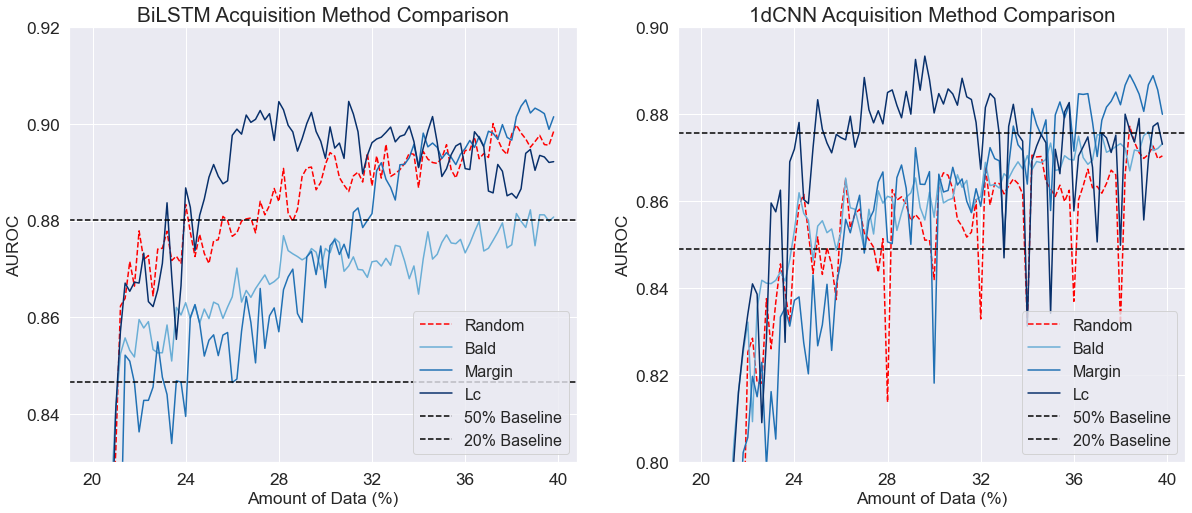

In [79]:
fig, ax = plt.subplots(ncols=2, figsize=(20, 8))

ax[0].set_ylim(0.83, 0.92)
df_rename.loc[:, list(filter(lambda x: x == "Random", df_rename.columns))].plot.line(ax=ax[0], color="red", linestyle="--");
df_rename.loc[:, list(filter(lambda x: x != "Random", df_rename.columns))].plot.line(ax=ax[0], colormap=blue_cmap);
ax[0].axhline(bilstm_50, color="black", linestyle="--", label="50% Baseline")
ax[0].axhline(bilstm_20, color="black", linestyle="--", label="20% Baseline")
ax[0].set_title("BiLSTM Acquisition Method Comparison", size="xx-large")
ax[0].set_xlabel("Amount of Data (%)", size="x-large")
ax[0].set_xticklabels([0, 20, 24, 28, 32, 36, 40], size="x-large")
ax[0].tick_params(axis="both", labelsize="x-large")
ax[0].set_ylabel("AUROC", size="x-large")
ax[0].legend(prop={"size": 16})
# ax[0].legend(loc='best', bbox_to_anchor=(1., 1.))

ax[1].set_ylim(0.8, 0.9)
df_1d_rename.loc[:, list(filter(lambda x: x == "Random", df_1d_rename.columns))].plot.line(ax=ax[1], color="red", linestyle="--");
df_1d_rename.loc[:, list(filter(lambda x: x != "Random", df_1d_rename.columns))].plot.line(ax=ax[1], colormap=blue_cmap);
ax[1].axhline(cnnlstm_50, color="black", linestyle="--", label="50% Baseline")
ax[1].axhline(cnnlstm_20, color="black", linestyle="--", label="20% Baseline")
ax[1].set_title("1dCNN Acquisition Method Comparison", size="xx-large")
ax[1].set_xlabel("Amount of Data (%)", size="x-large")
ax[1].set_xticklabels([0, 20, 24, 28, 32, 36, 40], size="x-large")
ax[1].set_ylabel("AUROC", size="x-large")
ax[1].legend(loc="lower right", prop={"size": 16})
ax[1].tick_params(axis="both", labelsize="x-large")
# ax[1].legend(loc='best', bbox_to_anchor=(1., 1.))

## Acquisition Period BiLSTM-Margin-5/10, BiLSTM-bald(mc)-acq5/10

In [80]:
fname = "acq_period"
DIR = "./wandb_csv_results/"
df = pd.read_csv(f"{DIR}/{fname}.csv", index_col=0)

column_name = list(filter(lambda x: "valid" in x and x.endswith(")"), df.columns))

df_rename = df[:100][column_name].rename(columns={
    c: c.split("Bilstm")[1].split(" ")[1].lower().capitalize() + acq for c, acq in zip(column_name, [" Acq 10", " Acq 5"]*2)
})

In [81]:
acq_10 = df_rename[list(filter(lambda x: x.endswith("10"), df_rename.columns))][:50]

acq_10_cols = list(filter(lambda x: x.endswith("10"), df_rename.columns))
df_rename[acq_10_cols] = pd.concat([acq_10, acq_10]).sort_index().reset_index(drop=True)

C:\Users\pha\AppData\Local\Temp/ipykernel_3192/2535289614.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0, 20, 24, 28, 32, 36, 40])


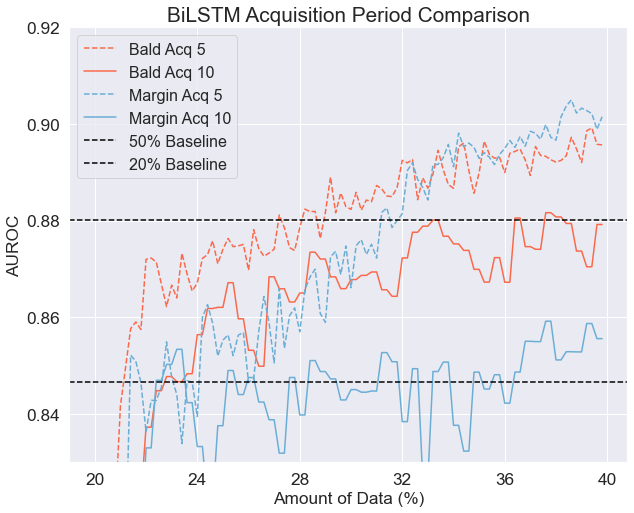

In [82]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.set_ylim(0.83, 0.92)
df_rename.loc[:, list(filter(lambda x: x == "Bald Acq 5", df_rename.columns))].plot.line(ax=ax, colormap=red_cmap, linestyle="--");
df_rename.loc[:, list(filter(lambda x: x == "Bald Acq 10", df_rename.columns))].plot.line(ax=ax, colormap=red_cmap);
df_rename.loc[:, list(filter(lambda x: x == "Margin Acq 5", df_rename.columns))].plot.line(ax=ax, colormap=blue_cmap, linestyle="--");
df_rename.loc[:, list(filter(lambda x: x == "Margin Acq 10", df_rename.columns))].plot.line(ax=ax, colormap=blue_cmap,);
ax.axhline(bilstm_50, color="black", linestyle="--", label="50% Baseline")
ax.axhline(bilstm_20, color="black", linestyle="--", label="20% Baseline")
ax.set_title("BiLSTM Acquisition Period Comparison", size="xx-large")
ax.set_xlabel("Amount of Data (%)", size="x-large")
ax.set_ylabel("AUROC", size="x-large")
ax.set_xticklabels([0, 20, 24, 28, 32, 36, 40])
ax.tick_params(axis="both", labelsize="x-large")
ax.legend(prop={"size": 16})
# ax.legend(loc='best', bbox_to_anchor=(1., 1.))

## Acquisition Amount BiLSTM-BALD

In [83]:
fname = "acq_amount"
DIR = "./wandb_csv_results/"
df = pd.read_csv(f"{DIR}/{fname}.csv", index_col=0)

column_name = list(filter(lambda x: "valid" in x and x.endswith(")"), df.columns))

df_rename = df[:100][column_name].rename(columns={
    c: "Increment " +c.split("INC")[1].split(" ")[0] for c in column_name
})

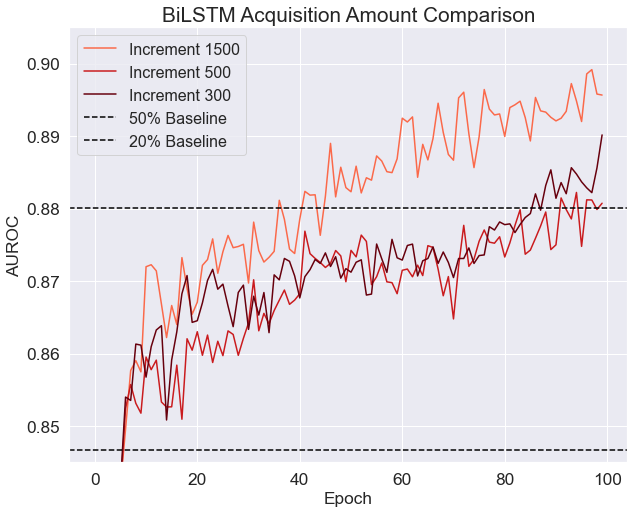

In [84]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.set_ylim(0.845, 0.905)
df_rename.plot.line(ax=ax, colormap=red_cmap);
ax.axhline(bilstm_50, color="black", linestyle="--", label="50% Baseline")
ax.axhline(bilstm_20, color="black", linestyle="--", label="20% Baseline")
ax.set_title("BiLSTM Acquisition Amount Comparison", size="xx-large")
ax.set_xlabel("Epoch", size="x-large")
ax.set_ylabel("AUROC", size="x-large")
ax.tick_params(axis="both", labelsize="x-large")
ax.legend(prop={"size": 16})
# ax.legend(loc='best', bbox_to_anchor=(1., 1.))

## Retrain Comparison

In [85]:
fname = "retrain_bilstm"
DIR = "./wandb_csv_results/"
df = pd.read_csv(f"{DIR}/{fname}.csv", index_col=0)

column_name = list(filter(lambda x: "valid" in x and x.endswith(")"), df.columns))
df_rename = df[:100][column_name].rename(columns={
    c: "BiLSTM " + c.split("Bilstm")[1].split(" ")[1].lower().capitalize() for c in column_name
})

In [86]:
fname = "retrain_1dcnn"
DIR = "./wandb_csv_results/"
df_1d = pd.read_csv(f"{DIR}/{fname}.csv", index_col=0)

column_name = list(filter(lambda x: "valid" in x and x.endswith(")"), df_1d.columns))

df_1d_rename = df_1d[:100][column_name].rename(columns={
    c: "1dCNN " + c.split("Cnnlstm")[1].split(" ")[1].lower().capitalize() for c in column_name
})

C:\Users\pha\AppData\Local\Temp/ipykernel_3192/3125195546.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels([0, 20, 24, 28, 32, 36, 40])
C:\Users\pha\AppData\Local\Temp/ipykernel_3192/3125195546.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels([0, 20, 24, 28, 32, 36, 40])


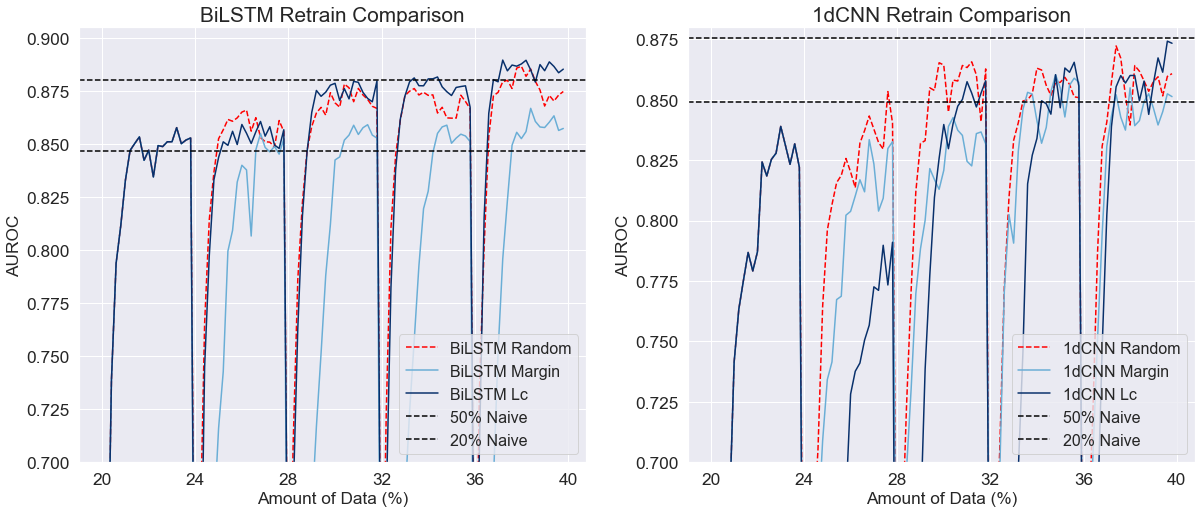

In [87]:
fig, ax = plt.subplots(ncols=2, figsize=(20, 8))

ax[0].set_ylim(0.7, 0.905)
df_rename.loc[:, list(filter(lambda x: x.endswith("Random"), df_rename.columns))].plot.line(ax=ax[0], color="red", linestyle="--");
df_rename.loc[:, list(filter(lambda x: not x.endswith("Random"), df_rename.columns))].plot.line(ax=ax[0], colormap=blue_cmap);
ax[0].axhline(bilstm_50, color="black", linestyle="--", label="50% Naive")
ax[0].axhline(bilstm_20, color="black", linestyle="--", label="20% Naive")
ax[0].set_title("BiLSTM Retrain Comparison", size="xx-large")
ax[0].set_xlabel("Amount of Data (%)", size="x-large")
ax[0].set_xticklabels([0, 20, 24, 28, 32, 36, 40])
ax[0].set_ylabel("AUROC", size="x-large")
ax[0].legend(prop={"size": 16})
ax[0].tick_params(axis="both", labelsize="x-large")
# ax[0].legend(loc='best', bbox_to_anchor=(1., 1.))

ax[1].set_ylim(0.7, 0.88)
df_1d_rename.loc[:, list(filter(lambda x: x.endswith("Random"), df_1d_rename.columns))].plot.line(ax=ax[1], color="red", linestyle="--");
df_1d_rename.loc[:, list(filter(lambda x: not x.endswith("Random"), df_1d_rename.columns))].plot.line(ax=ax[1], colormap=blue_cmap);
ax[1].axhline(cnnlstm_50, color="black", linestyle="--", label="50% Naive")
ax[1].axhline(cnnlstm_20, color="black", linestyle="--", label="20% Naive")
ax[1].set_title("1dCNN Retrain Comparison", size="xx-large")
ax[1].set_xlabel("Amount of Data (%)", size="x-large")
ax[1].set_xticklabels([0, 20, 24, 28, 32, 36, 40])
ax[1].set_ylabel("AUROC", size="x-large")
ax[1].legend(prop={"size": 16})
ax[1].tick_params(axis="both", labelsize="x-large")
# ax[1].legend(loc='best', bbox_to_anchor=(1., 1.))